In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [26]:
# Read the CSV file
file_path = r"C:\Users\castl\Desktop\Internship stuff\fL_Data\Extracted\Whitlow_SLAC.csv"
df = pd.read_csv(file_path)

In [27]:
# Get unique Q² values and sort them
q2_values = sorted(df['Q^2'].unique())
print("Unique Q² values:", q2_values)

# Define colors for each Q² bin
colors = plt.cm.tab10(np.linspace(0, 1, len(q2_values)))

# Show some basic statistics
print("\nData Summary:")
print(f"Number of data points: {len(df)}")
print(f"xB range: {df['xB'].min():.3f} - {df['xB'].max():.3f}")
print(f"FL range: {df['FL'].min():.3f} - {df['FL'].max():.3f}")
print(f"Q² range: {df['Q^2'].min():.2f} - {df['Q^2'].max():.2f}")
print(f"Number of Q² bins: {len(q2_values)}")

Unique Q² values: [0.75, 1.75, 2.5, 3.75, 5.0, 6.5, 8.0, 10.0, 15.0, 20.0]

Data Summary:
Number of data points: 84
xB range: 0.062 - 0.881
FL range: -0.020 - 0.142
Q² range: 0.75 - 20.00
Number of Q² bins: 10


Saved combined plot: All Q^2.png


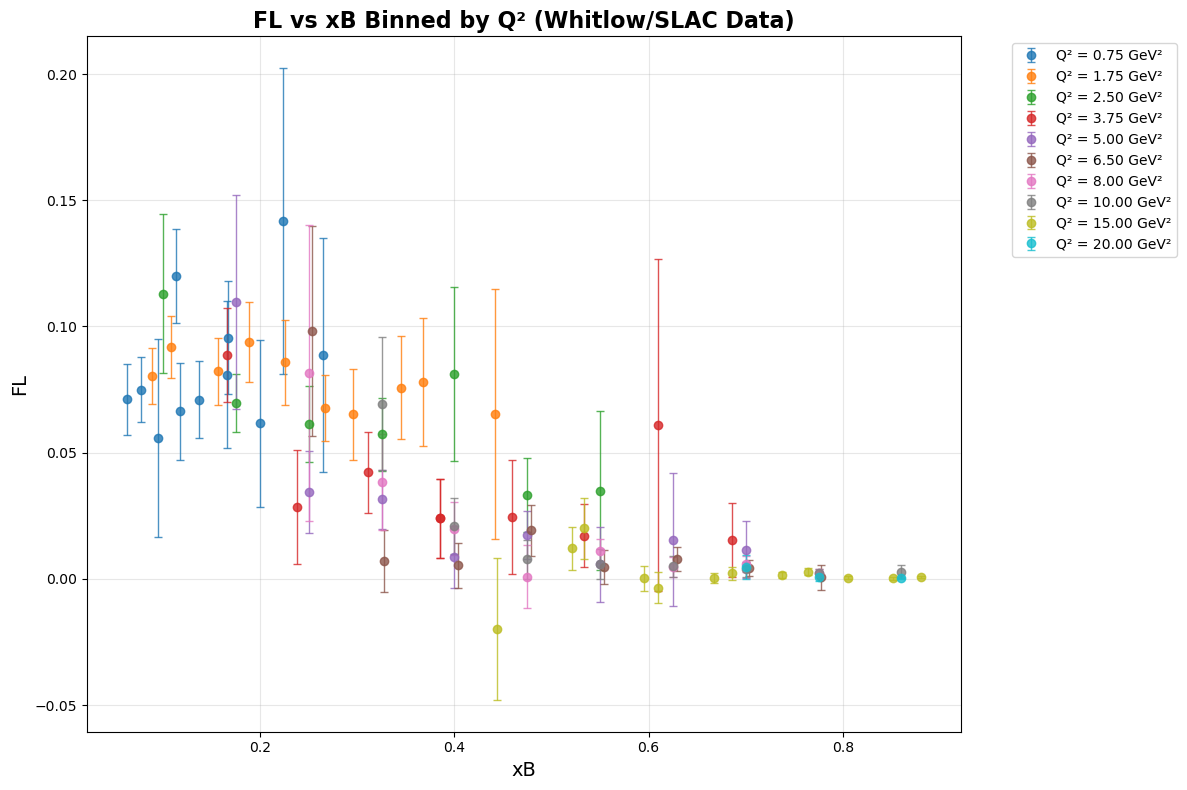

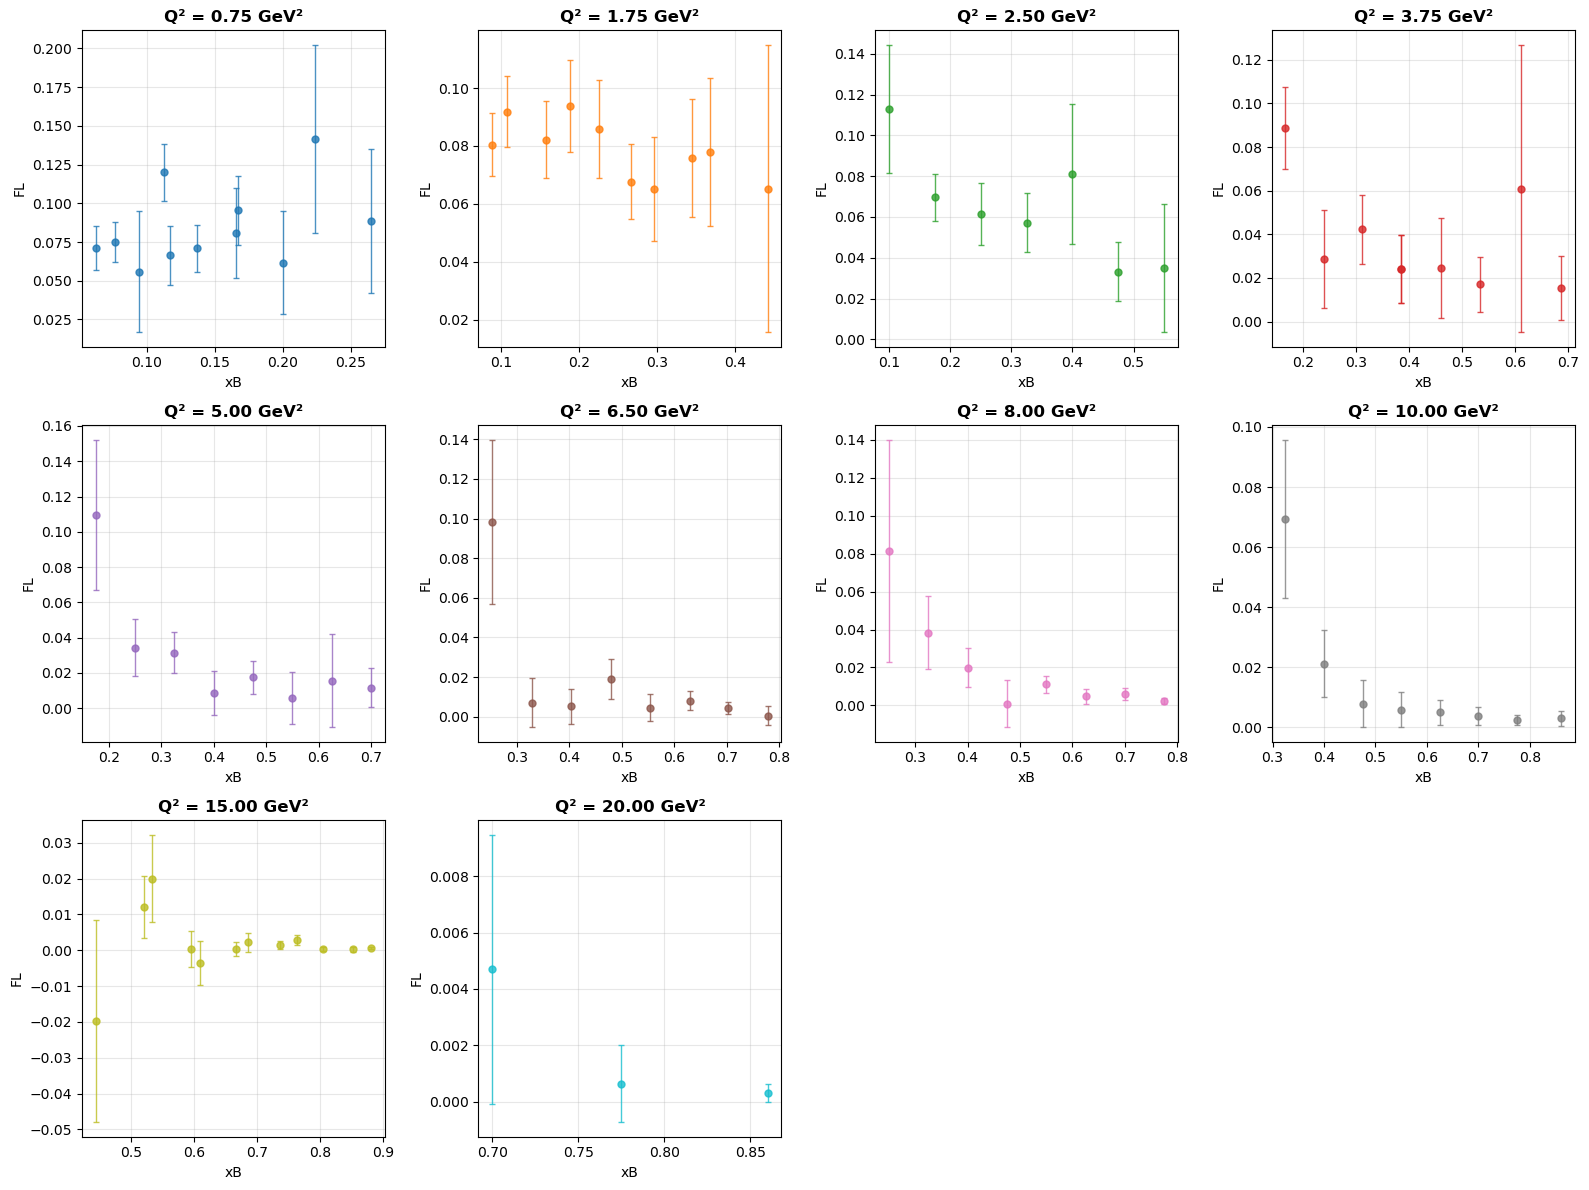


Saving individual plots to: C:\Users\castl\Desktop\Internship stuff\fL_Data\Extracted\Whitlow_SLAC_fL_vs_xB_Sorted_By_Q^2
------------------------------------------------------------
Saved: Q^2=0.75.png


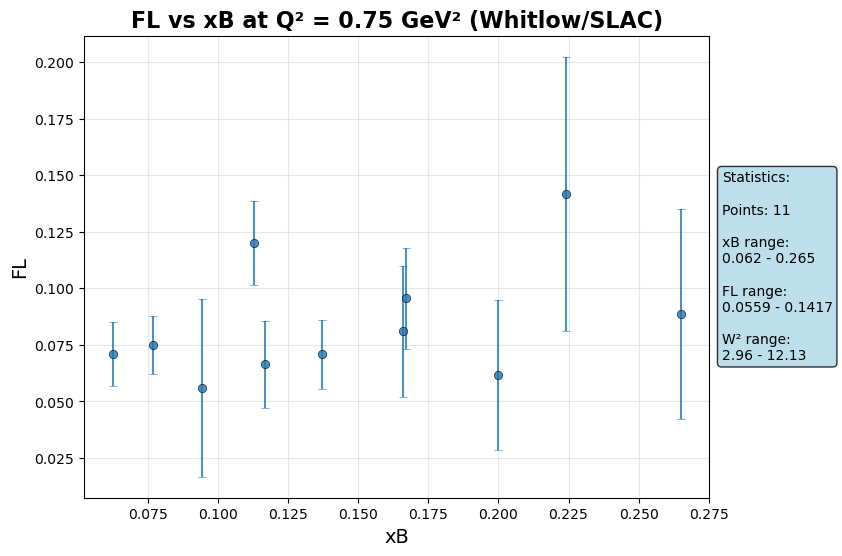

Saved: Q^2=1.75.png


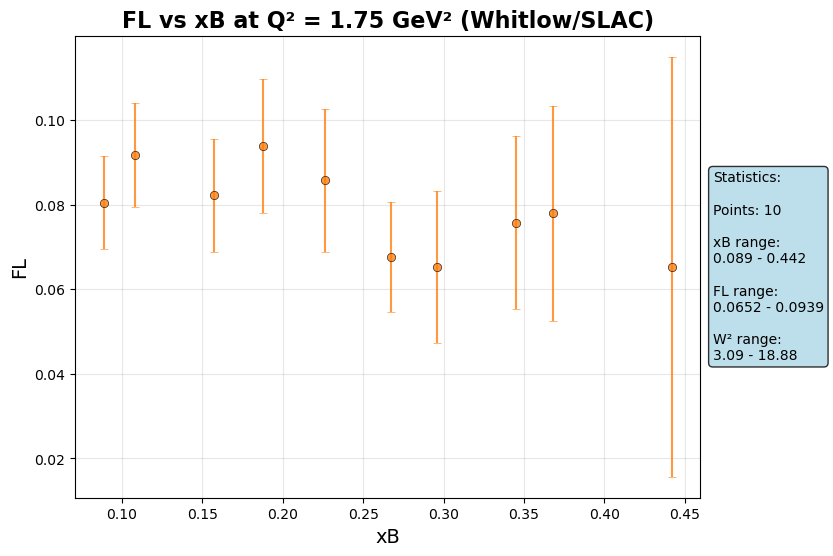

Saved: Q^2=2.50.png


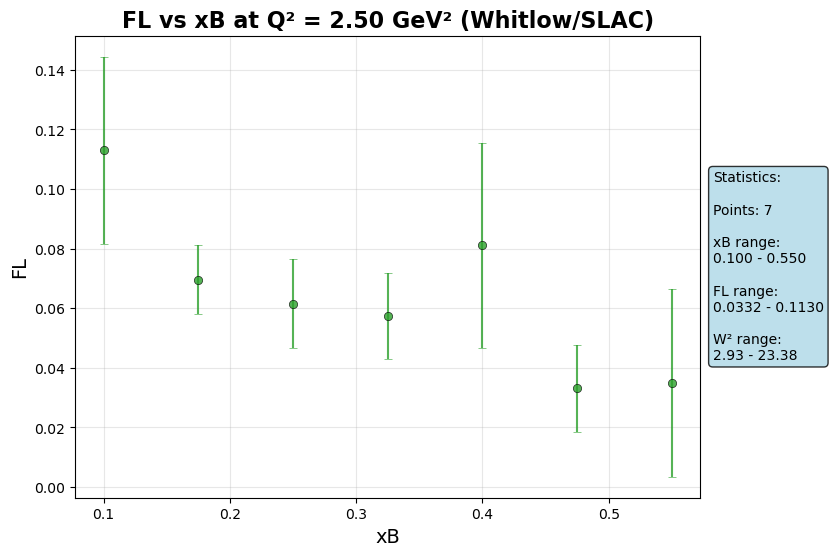

Saved: Q^2=3.75.png


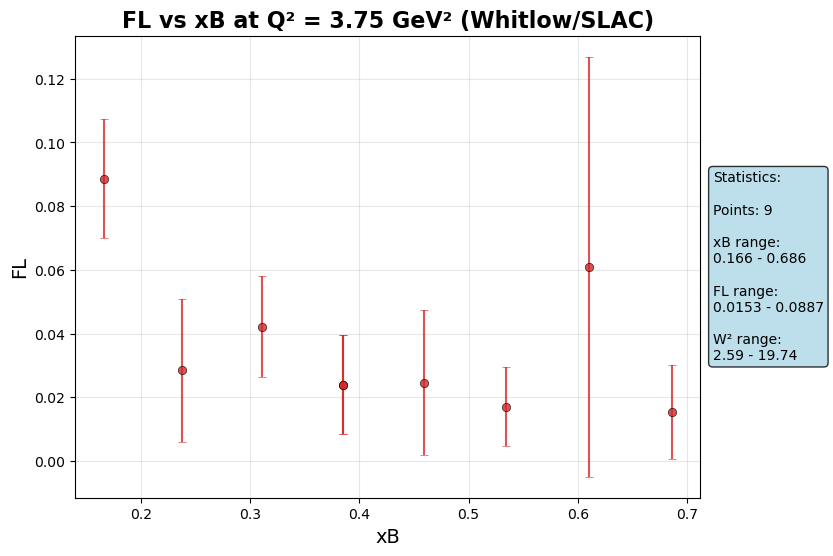

Saved: Q^2=5.00.png


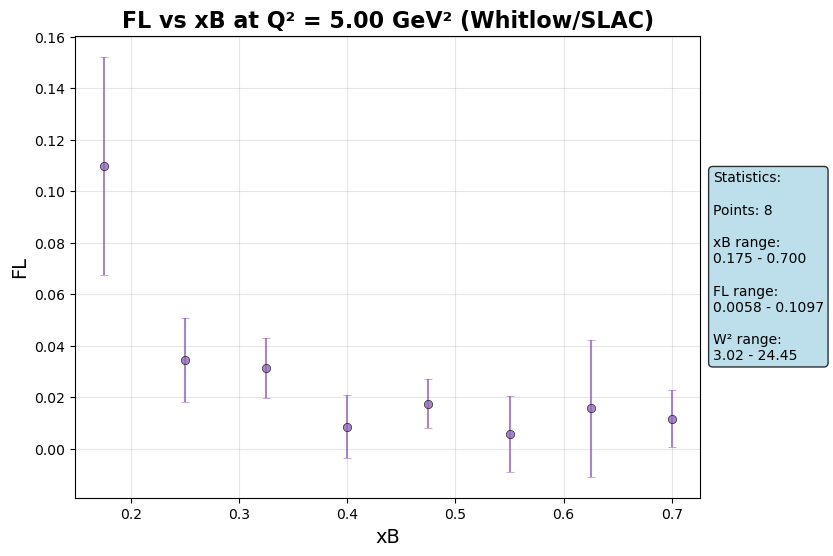

Saved: Q^2=6.50.png


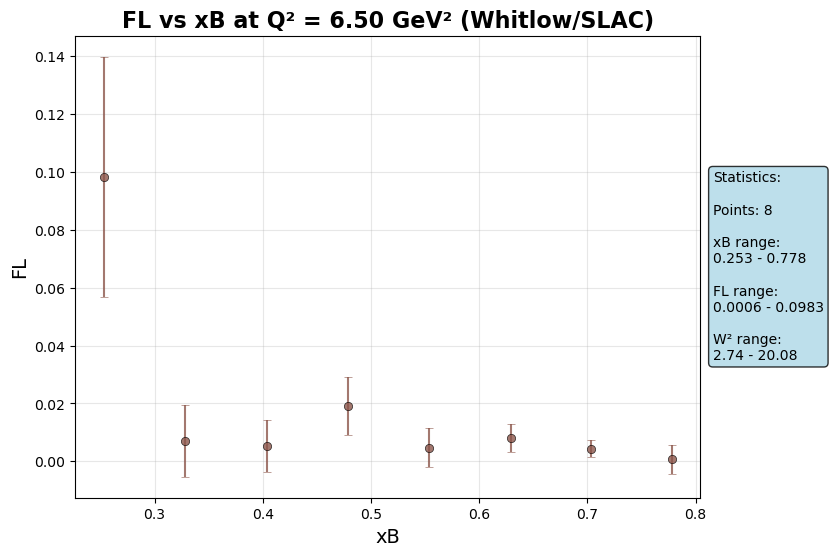

Saved: Q^2=8.00.png


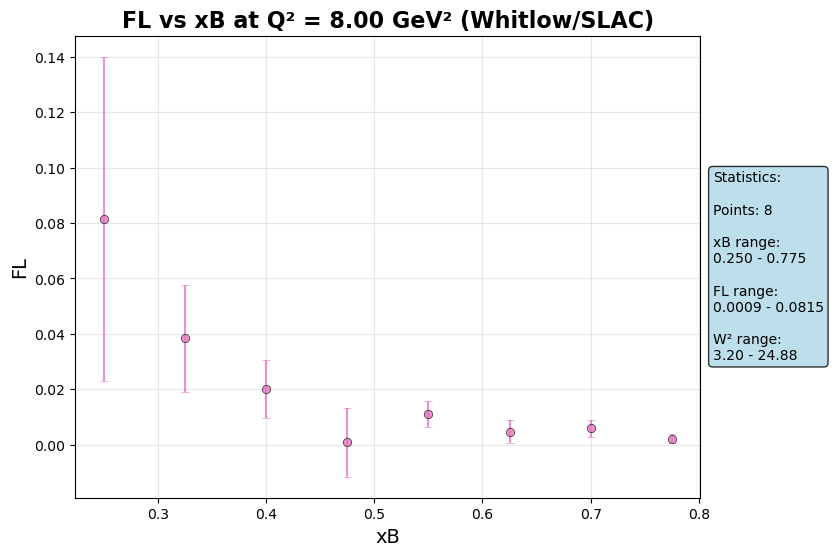

In [ ]:
#Create main plot with binned data
plt.figure(figsize=(12, 8))

# Plot each Q² bin separately
for i, q2 in enumerate(q2_values):
    # Filter data for this Q² value
    bin_data = df[df['Q^2'] == q2]
    
    # Plot points for this Q² bin
    plt.errorbar(bin_data['xB'], bin_data['FL'], yerr=bin_data['errFL'],
                fmt='o', color=colors[i], alpha=0.8, markersize=6,
                capsize=3, capthick=1, elinewidth=1,
                label=f'Q² = {q2:.2f} GeV²')

plt.xlabel('xB', fontsize=14)
plt.ylabel('FL', fontsize=14)
plt.title('FL vs xB Binned by Q² (Whitlow/SLAC Data)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Save the combined plot
combined_filename = "All Q^2.png"
combined_filepath = os.path.join(output_dir, combined_filename)
plt.savefig(combined_filepath, dpi=300, bbox_inches='tight')
print(f"Saved combined plot: {combined_filename}")

plt.show()

# Create output directory if it doesn't exist
output_dir = r"C:\Users\castl\Desktop\Internship stuff\fL_Data\Extracted\Whitlow_SLAC_fL_vs_xB_Sorted_By_Q^2"
os.makedirs(output_dir, exist_ok=True)

# Calculate grid dimensions to accommodate all Q² values
n_plots = len(q2_values)
n_cols = 4
n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division

# Create a subplot version for better visualization
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
if n_rows == 1:
    axes = [axes]  # Make sure axes is always 2D
axes = np.array(axes).flatten()

# Plot each Q² bin in its own subplot
for i, q2 in enumerate(q2_values):
    # Filter data for this Q² value
    bin_data = df[df['Q^2'] == q2]
    
    # Plot in subplot
    axes[i].errorbar(bin_data['xB'], bin_data['FL'], yerr=bin_data['errFL'],
                    fmt='o', color=colors[i], alpha=0.8, markersize=5,
                    capsize=2, capthick=1, elinewidth=1)
    
    axes[i].set_title(f'Q² = {q2:.2f} GeV²', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('xB', fontsize=10)
    axes[i].set_ylabel('FL', fontsize=10)
    axes[i].grid(True, alpha=0.3)

# Remove empty subplots if any
for i in range(len(q2_values), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Create and save individual plots for each Q² bin
print(f"\nSaving individual plots to: {output_dir}")
print("-" * 60)

for i, q2 in enumerate(q2_values):
    # Filter data for this Q² value
    bin_data = df[df['Q^2'] == q2]
    
    # Create individual figure with extra space for external text
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot data
    ax.errorbar(bin_data['xB'], bin_data['FL'], yerr=bin_data['errFL'],
                fmt='o', color=colors[i], alpha=0.8, markersize=6,
                capsize=3, capthick=1.5, elinewidth=1.5, markeredgecolor='black',
                markeredgewidth=0.5)
    
    ax.set_xlabel('xB', fontsize=14)
    ax.set_ylabel('FL', fontsize=14)
    ax.set_title(f'FL vs xB at Q² = {q2:.2f} GeV² (Whitlow/SLAC)', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add text box with statistics to the right of the plot
    stats_text = f'Statistics:\n\nPoints: {len(bin_data)}\n\nxB range:\n{bin_data["xB"].min():.3f} - {bin_data["xB"].max():.3f}\n\nFL range:\n{bin_data["FL"].min():.4f} - {bin_data["FL"].max():.4f}\n\nW² range:\n{bin_data["W^2"].min():.2f} - {bin_data["W^2"].max():.2f}'
    
    # Position text box to the right of the plot area
    plt.text(1.02, 0.5, stats_text, transform=ax.transAxes, 
             verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
             fontsize=10, fontweight='normal')
    
    # Adjust layout to accommodate the external text
    plt.subplots_adjust(right=0.75)
    
    # Save the plot
    filename = f"Q^2={q2:.2f}.png"
    filepath = os.path.join(output_dir, filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"Saved: {filename}")
    
    plt.show()
    plt.close()

print(f"\nAll individual plots saved to: {output_dir}")

# Print statistics for each Q² bin
print("\nStatistics for each Q² bin:")
print("-" * 50)
for q2 in q2_values:
    bin_data = df[df['Q^2'] == q2]
    print(f"Q² = {q2:.2f} GeV²:")
    print(f"  Points: {len(bin_data)}")
    print(f"  xB range: {bin_data['xB'].min():.3f} - {bin_data['xB'].max():.3f}")
    print(f"  FL range: {bin_data['FL'].min():.4f} - {bin_data['FL'].max():.4f}")
    print(f"  W² range: {bin_data['W^2'].min():.2f} - {bin_data['W^2'].max():.2f}")
    print()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Read the CSV file
file_path = r"C:\Users\castl\Desktop\Internship stuff\fL_Data\Extracted\BCDMS.csv"
df = pd.read_csv(file_path)

In [22]:
# Get unique Q² values and sort them
q2_values = sorted(df['Q^2'].unique())
print("Unique Q² values:", q2_values)

Unique Q² values: [15.0, 20.0, 45.0]


In [23]:
# Define colors for each Q² bin
colors = plt.cm.tab10(np.linspace(0, 1, len(q2_values)))

# Show some basic statistics
print("\nData Summary:")
print(f"Number of data points: {len(df)}")
print(f"xB range: {df['xB'].min():.3f} - {df['xB'].max():.3f}")
print(f"FL range: {df['FL'].min():.3f} - {df['FL'].max():.3f}")
print(f"Q² range: {df['Q^2'].min():.2f} - {df['Q^2'].max():.2f}")
print(f"Number of Q² bins: {len(q2_values)}")


Data Summary:
Number of data points: 7
xB range: 0.070 - 0.626
FL range: -0.003 - 0.059
Q² range: 15.00 - 45.00
Number of Q² bins: 3


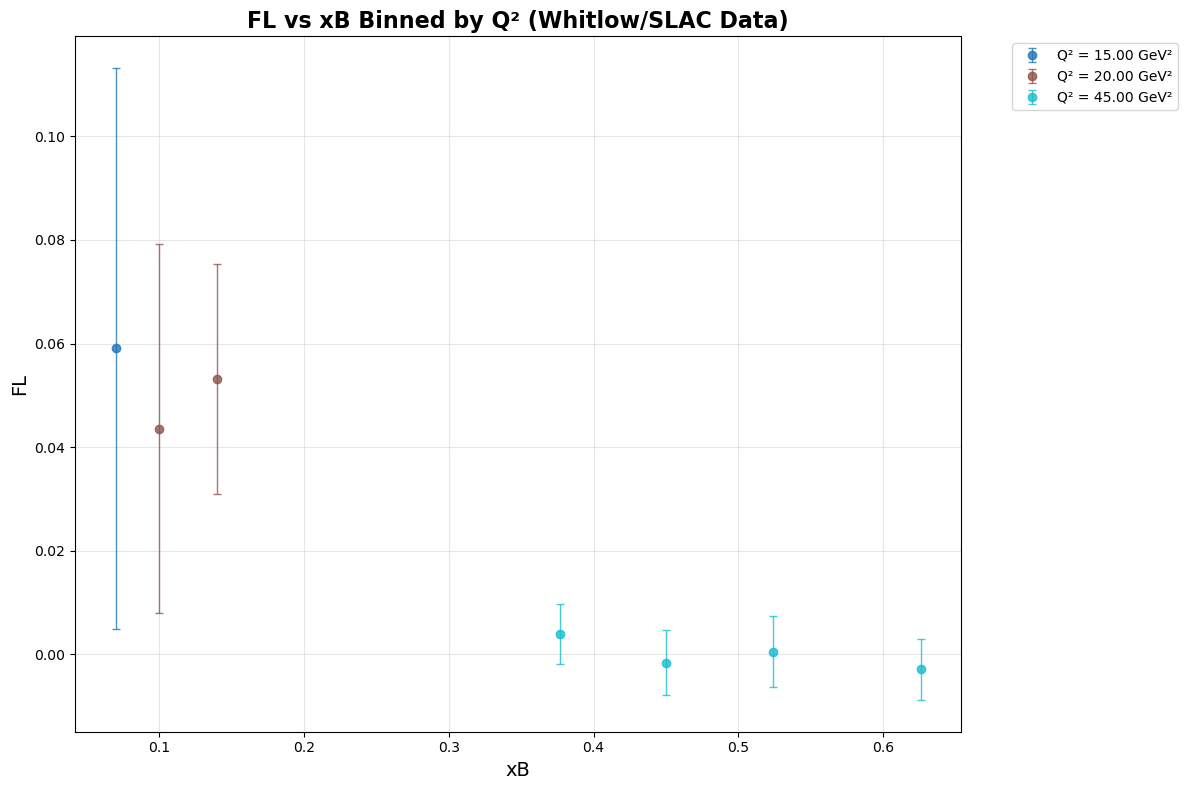

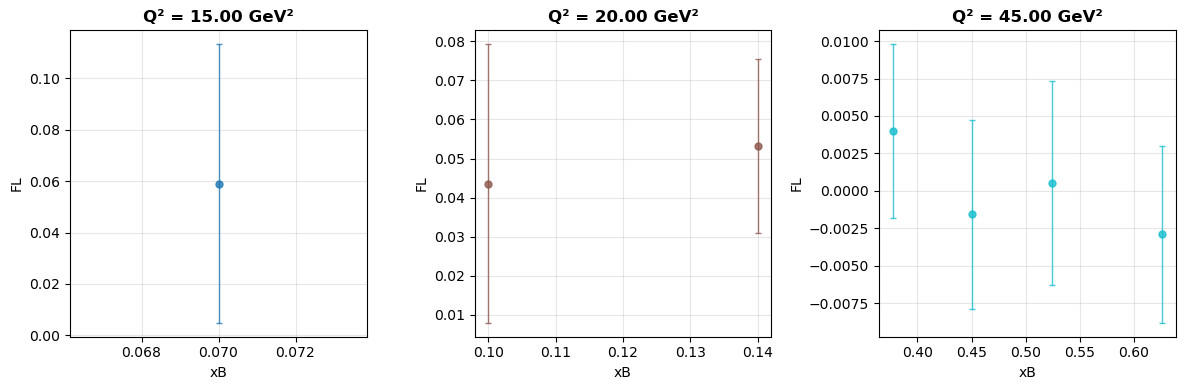


Saving individual plots to: C:\Users\castl\Desktop\Internship stuff\fL_Data\Extracted\BCDMS_fL_vs_xB_Sorted_By_Q^2
------------------------------------------------------------
Saved: Q^2=15.00.png


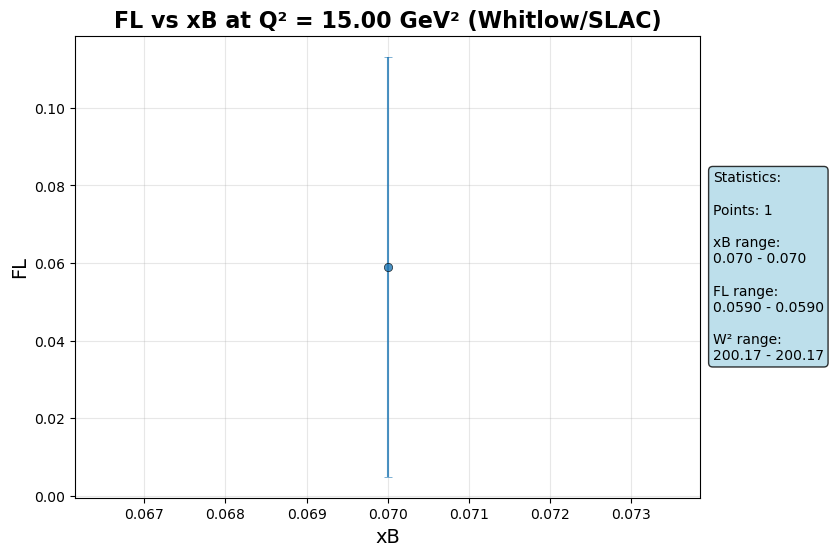

Saved: Q^2=20.00.png


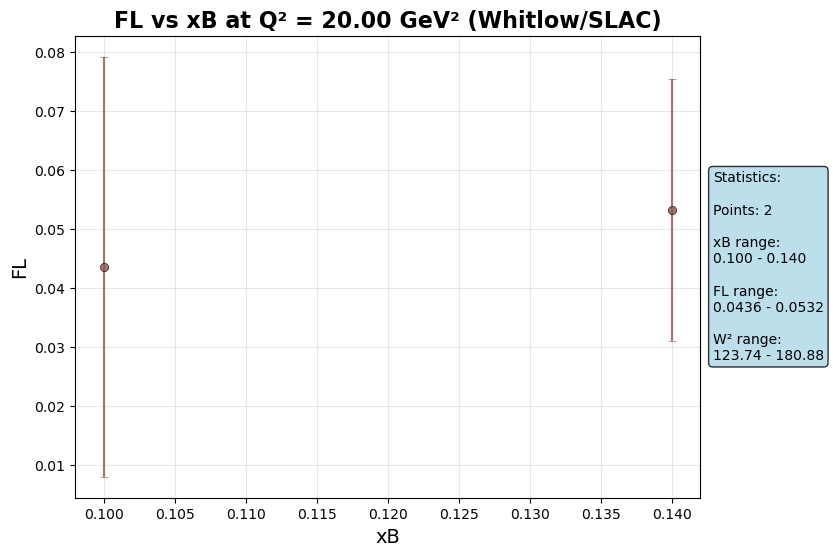

Saved: Q^2=45.00.png


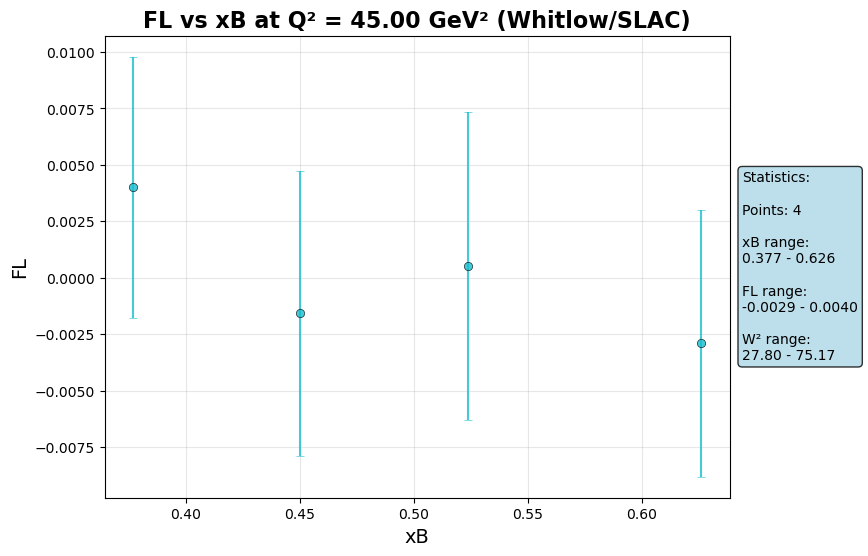


All individual plots saved to: C:\Users\castl\Desktop\Internship stuff\fL_Data\Extracted\BCDMS_fL_vs_xB_Sorted_By_Q^2

Statistics for each Q² bin:
--------------------------------------------------
Q² = 15.00 GeV²:
  Points: 1
  xB range: 0.070 - 0.070
  FL range: 0.0590 - 0.0590
  W² range: 200.17 - 200.17

Q² = 20.00 GeV²:
  Points: 2
  xB range: 0.100 - 0.140
  FL range: 0.0436 - 0.0532
  W² range: 123.74 - 180.88

Q² = 45.00 GeV²:
  Points: 4
  xB range: 0.377 - 0.626
  FL range: -0.0029 - 0.0040
  W² range: 27.80 - 75.17



In [24]:
# Create main plot with binned data
plt.figure(figsize=(12, 8))

# Plot each Q² bin separately
for i, q2 in enumerate(q2_values):
    # Filter data for this Q² value
    bin_data = df[df['Q^2'] == q2]
    
    # Plot points for this Q² bin
    plt.errorbar(bin_data['xB'], bin_data['FL'], yerr=bin_data['errFL'],
                fmt='o', color=colors[i], alpha=0.8, markersize=6,
                capsize=3, capthick=1, elinewidth=1,
                label=f'Q² = {q2:.2f} GeV²')

plt.xlabel('xB', fontsize=14)
plt.ylabel('FL', fontsize=14)
plt.title('FL vs xB Binned by Q² (Whitlow/SLAC Data)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Create output directory if it doesn't exist
import os
output_dir = r"C:\Users\castl\Desktop\Internship stuff\fL_Data\Extracted\BCDMS_fL_vs_xB_Sorted_By_Q^2"
os.makedirs(output_dir, exist_ok=True)

# Calculate grid dimensions to accommodate all Q² values
n_plots = len(q2_values)
n_cols = 4
n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division

# Create a subplot version for better visualization
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
if n_rows == 1:
    axes = [axes]  # Make sure axes is always 2D
axes = np.array(axes).flatten()

# Plot each Q² bin in its own subplot
for i, q2 in enumerate(q2_values):
    # Filter data for this Q² value
    bin_data = df[df['Q^2'] == q2]
    
    # Plot in subplot
    axes[i].errorbar(bin_data['xB'], bin_data['FL'], yerr=bin_data['errFL'],
                    fmt='o', color=colors[i], alpha=0.8, markersize=5,
                    capsize=2, capthick=1, elinewidth=1)
    
    axes[i].set_title(f'Q² = {q2:.2f} GeV²', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('xB', fontsize=10)
    axes[i].set_ylabel('FL', fontsize=10)
    axes[i].grid(True, alpha=0.3)

# Remove empty subplots if any
for i in range(len(q2_values), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Create and save individual plots for each Q² bin
print(f"\nSaving individual plots to: {output_dir}")
print("-" * 60)

for i, q2 in enumerate(q2_values):
    # Filter data for this Q² value
    bin_data = df[df['Q^2'] == q2]
    
    # Create individual figure with extra space for external text
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot data
    ax.errorbar(bin_data['xB'], bin_data['FL'], yerr=bin_data['errFL'],
                fmt='o', color=colors[i], alpha=0.8, markersize=6,
                capsize=3, capthick=1.5, elinewidth=1.5, markeredgecolor='black',
                markeredgewidth=0.5)
    
    ax.set_xlabel('xB', fontsize=14)
    ax.set_ylabel('FL', fontsize=14)
    ax.set_title(f'FL vs xB at Q² = {q2:.2f} GeV² (Whitlow/SLAC)', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add text box with statistics to the right of the plot
    stats_text = f'Statistics:\n\nPoints: {len(bin_data)}\n\nxB range:\n{bin_data["xB"].min():.3f} - {bin_data["xB"].max():.3f}\n\nFL range:\n{bin_data["FL"].min():.4f} - {bin_data["FL"].max():.4f}\n\nW² range:\n{bin_data["W^2"].min():.2f} - {bin_data["W^2"].max():.2f}'
    
    # Position text box to the right of the plot area
    plt.text(1.02, 0.5, stats_text, transform=ax.transAxes, 
             verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
             fontsize=10, fontweight='normal')
    
    # Adjust layout to accommodate the external text
    plt.subplots_adjust(right=0.75)
    
    # Save the plot
    filename = f"Q^2={q2:.2f}.png"
    filepath = os.path.join(output_dir, filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"Saved: {filename}")
    
    plt.show()
    plt.close()

print(f"\nAll individual plots saved to: {output_dir}")

# Print statistics for each Q² bin
print("\nStatistics for each Q² bin:")
print("-" * 50)
for q2 in q2_values:
    bin_data = df[df['Q^2'] == q2]
    print(f"Q² = {q2:.2f} GeV²:")
    print(f"  Points: {len(bin_data)}")
    print(f"  xB range: {bin_data['xB'].min():.3f} - {bin_data['xB'].max():.3f}")
    print(f"  FL range: {bin_data['FL'].min():.4f} - {bin_data['FL'].max():.4f}")
    print(f"  W² range: {bin_data['W^2'].min():.2f} - {bin_data['W^2'].max():.2f}")
    print()